## 1. Частотность и фонетика

(Первая часть домашнего задания строится на тех же данных, что были в предыдущем домашнем задании. Вы можете пропустить описание, если знакомы с датасетом)

Во многих лингвистических исследованиях отмечается, что часто используемые в языке слова звучат короче, а при их произнесении наблюдается редукция и коартикуляция. Работа Fabian Tomaschek et al. (2018) исследует гипотезу, что моторные навыки произнесения улучшаются с опытом, который, в свою очередь, напрямую связан с частотностью слова. Ученые попросили испытуемых (17 бакалавров университета Тюбингена, 8 мужчин и 9 женщин) прочитать вслух немецкие глаголы, содержащие звук [a:] в основе. Испытуемые были поставлены в экспериментальные условия, которые исподволь заставляли их читать быстрее или медленнее (slow/fast condition).

В этом задании мы просим вас сравнить длину звучания всего слова целиком, а также длину звучания интересующего ученых сегмента (звука [a:]) в условиях slow и fast. Хотя логично предположить, что в условии fast произнесение и слов, и сегментов будет короче, все же нужно убедиться, что данные это подтверждают, прежде чем переходить к более сложному анализу по сути вопроса. Кроме того, мы будем уверены, что экспериментальные условия были должным образом соблюдены, ученые не запутались в кодировании данных и документировали результаты корректно.

Интересующие нас переменные:

* `LogDurationW`  - log-transformed word duration (логарифм длины произнесения слова)

* `LogDurationA` - log-transformed segment duration (логарифм длины произнесения сегмента)

* `Cond` - condition: slow vs. fast (условие).

Ссылка на данные [link](https://raw.githubusercontent.com/LingData2019/LingData2020/master/data/dur_word_frequency.csv)

### 1.0 t-test

С помощью t-критерия Стьюдента мы хотим определить статистическую значимость различия значений применительно к следующим переменным:  

(a) word durarion in fast condition and word duration in slow condition,

(b) segment duration in fast condition and segment duration in slow condition.

Что мы хотим проверить, используя t-критерия Стьюдента?  
1) что если мы возьмем любую другую выборку, то в ней средние по этим переменным будут различаться

2) что различие этих длительностей имеет место не только на выборках, но и в генеральной совокупности

3) мы хотим подтвердить, что наша нулевая гипотеза верна

***Ответ***

1) Мы берем наши выборки из генеральной совокупности и  предполагаем, что они сбалансированны и так или иначе моделируют нашу генеральную совокупность, поэтому средние между разными выборками наоборот не должны различаться.

2) Значение длительности произнесения слов/сегментов действительно должно иметь место не только на выборке, но и на генеральной совокупности.

3) При помощи t-критерия Стьюдента (как в целом и других статистик) мы можем лишь отвергнуть нулевую гипотезу с некоторой вероятностью ошибки, однако не можем подтвердить, что она верна.

Таким образом, при помощи t-теста мы хотим проверить **п. 2.**

#### 1.1 Гипотезы

В первую очередь, сформулируйте нулевую гипотезу (H_0) и альтернативную гипотезу (H_1). Если для выполнения задания нужно сформулировать несколько H_0 и H_1, сделайте это, продублировав этот и следующий разделы (1.1а, 1.2a, 1.3.a, 1.1b, 1.2b и т.д.)  

***Ответ***

##### 1.1a Гипотезы
```
H0: средние по выборкам переменной LogDurationW в условиях fast и slow будут одинаковые (word_fast = word_sl0w)

H1: средние по выборкам переменнной LogDurationW в условиях fast и slow будут различаться (word_fast ≠ word_slow)
```
##### 1.1b Гипотезы
```
H0: средние по выборкам переменной LogDurationA в условиях fast и slow будут одинаковые (segment_fast = segment_sl0w)

H1: средние по выборкам переменнной LogDurationA в условиях fast и slow будут различаться (segment_fast ≠ segment_sl0w)
```

#### 1.2 Тест  

Загрузите данные и примените `t.test` для проверки гипотез.  

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
dur_word_freq <- read_csv("https://raw.githubusercontent.com/LingData2019/LingData2020/master/data/dur_word_frequency.csv")

ldw_slow <- dur_word_freq %>%
  filter(Cond == 'slow')

ldw_fast <- dur_word_freq %>%
  filter(Cond == 'fast')

t.test(ldw_slow$LogDurationW, ldw_fast$LogDurationW)

New names:
• `` -> `...1`
Rows: 832 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Lemma, Participant, Cond, Exponent
dbl (4): ...1, LogDurationA, LogDurationW, Frequency

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



	Welch Two Sample t-test

data:  ldw_slow$LogDurationW and ldw_fast$LogDurationW
t = 11.562, df = 829.89, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1123477 0.1582922
sample estimates:
 mean of x  mean of y 
-0.4483053 -0.5836253 


In [3]:
ldа_slow <- dur_word_freq %>%
  filter(Cond == 'slow')

ldа_fast <- dur_word_freq %>%
  filter(Cond == 'fast')

t.test(ldа_slow$LogDurationA, ldа_fast$LogDurationA)


	Welch Two Sample t-test

data:  ldа_slow$LogDurationA and ldа_fast$LogDurationA
t = 7.5116, df = 822.67, p-value = 1.523e-13
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.08075098 0.13788190
sample estimates:
mean of x mean of y 
-1.628756 -1.738072 


#### 1.3 Интерпретация  

Интерпретируйте результаты t-теста. Включите в вывод t-статистику, степени свободы и p-values. Можно ли заключить, что имеется различие в длительности слов в быстрых и медленных условиях в генеральной совокупности? Можно ли заключить то же самое в отношении длительности сегментов?

***Ответ***

Чтобы проверить, есть ли значимая разница в значении логарифма длины произнесения слова/сегмента между выборкой, где респонденты должны были читать быстро, и выборкой, где респонденты должны были читать медленно, было проведено два t-теста. В обоих случаях возможно отклонить нулевую гипотезу для генеральной совокупности с уровнем значимости α = 0.05 (t = 11.562, p-value = < 2.2e-16, df = 829.89; t = 7.5116, p-value = 1.523e-13, df = 822.67 для слов и сегментов соответственно).

## 2. Дискуссия

Возможно, применение t-test в чистом виде является не лучшей опцией для решения задачи 1.0. Если вам тоже так кажется, приведите аргументы против его использования и предложите другое решение.


***Ответ***

Чтобы p-value в случае использования t-test было подсчитано корректрно, необходимо, чтобы выполнялись следующие условия:

1) Распределение нормально и непрерывно;

2) Одинаковые дисперсии в выборках;

3) Независимость значений.

Проверим нормальность распределений логарифмов во всех условиях. Поскольку вся наша выборка содержит только около 800 элементов, то корректно будет использовать для этого тест Шапиро-Уилка. Для логарифмов длин произнесения слов значения p-value составляют 0.194 и 8.899e-15; для логарифмом длин произнесения сегментов - 0.0002291 и 5.419e-15 для быстрого и медленного условий соответственно. Иначе говоря, гипотезу о нормальности распределения нельзя отвергнуть только в одной выборке (для логарифма длин произнесения слов при быстром условии).

Также можем провести тест на нормальность для выборок без делений на условия. Тогда для логарифмов длин произнесения слов p-value = 5.586e-14, для логарифмов длин приоизнесения сегментов p-value = 2.044e-14, т. е. в обоих случаях мы вынуждены отвергнуть нулевую гипотезу о нормальности распределения.

Для более корректного подтверждения нашей гипотезы можно использовать тест Уилкоксона, который является непараметрическим аналогом t-testa и подходит (в отличие от теста Манна-Уитни, например) для непрерывных переменных.
Критерий Уилкоксона показал, что мы можем отклонить нулевую гипотезу о равенстве средних для логарифмов длин произнесения и слов, и сегментов (p-value < 2.2e-16 и p-value = 5.292e-13 соответственно).

#### 2.1 Код для решения    

Напишите код, который может помочь в аргументации и покажет другое решение.

In [4]:
# для выборок по условиям
shapiro.test(ldw_fast$LogDurationW)
shapiro.test(ldw_slow$LogDurationW)
shapiro.test(ldа_fast$LogDurationA)
shapiro.test(ldа_slow$LogDurationA)

# для всех выборок
shapiro.test(dur_word_freq$LogDurationW)
shapiro.test(dur_word_freq$LogDurationA)

# тест Уилкоксона для наших выборок
wilcox.test(ldw_slow$LogDurationW, ldw_fast$LogDurationW)
wilcox.test(ldа_slow$LogDurationA, ldа_fast$LogDurationA)


	Shapiro-Wilk normality test

data:  ldw_fast$LogDurationW
W = 0.99475, p-value = 0.194



	Shapiro-Wilk normality test

data:  ldw_slow$LogDurationW
W = 0.91638, p-value = 8.899e-15



	Shapiro-Wilk normality test

data:  ldа_fast$LogDurationA
W = 0.98408, p-value = 0.0002291



	Shapiro-Wilk normality test

data:  ldа_slow$LogDurationA
W = 0.91413, p-value = 5.419e-15



	Shapiro-Wilk normality test

data:  dur_word_freq$LogDurationW
W = 0.96152, p-value = 5.586e-14



	Shapiro-Wilk normality test

data:  dur_word_freq$LogDurationA
W = 0.9594, p-value = 2.044e-14



	Wilcoxon rank sum test with continuity correction

data:  ldw_slow$LogDurationW and ldw_fast$LogDurationW
W = 125020, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  ldа_slow$LogDurationA and ldа_fast$LogDurationA
W = 111359, p-value = 5.292e-13
alternative hypothesis: true location shift is not equal to 0


## 3. Корреляционный анализ  

Датасет представляет (с изменениями) данные из статьи *Hansen (2016). What makes a word easy to acquire?* [link](http://dx.doi.org/10.1177/0142723716679956). Автора интересовало, связано ли усвоение того или иного слова с другими факторами, такими как частота слова в языке в целом или в речи родителей. Кроме того, он рассматривал гипотезы, что присутствие тех или иных букв или звуков в слове, а также лексическая категория, к которой относится слово, могли бы быть связаны с возрастом усвоения.  

Переменные:  
* `WordNo` --  слово в норвежском языке  
* `Translation` -- перевод на английский  
* `AgeOfAcq` -- возраст, в котором было усвоено слово, в месяцах (оценка по MacArthur-Bates Communicative Development Inventories). Указаны данные от 12 до 36 месяцев (от года до 3 лет)     
* `CumulOtherWords` -- как много других слов ребенок знает к моменту освоения данного слова (округлено до 10)  
* `WordCategory` -- узкая категория, к которой относится слово (например, `people` или `action words`)  
* `BroadCategory` -- широкая категория, к которой относится слово (например, `nominals` или `predicates`) * `FreqCorpus` -- частота слова в некотором корпусе норвежского языка  
* `ParentFreq` -- частота слова в речи родителей, обращенной к ребенку (по данным норвежских корпусов CHILDES)  

Ссылка на данные: [https://raw.githubusercontent.com/olesar/2025dav4compling/refs/heads/main/data/TatmanR_Lexical_acquisition_NO.csv]

### 3.1 Чтение данных  

Запишите данные в переменную `Norwegian_data`, предварительно удалив строки, в которых возраст усвоения слова не задан (`NA`). Ваш код должен выдавать количество строк в получившемся датасете.

In [5]:
Norwegian_data <- read.csv("https://raw.githubusercontent.com/olesar/2025dav4compling/refs/heads/main/data/TatmanR_Lexical_acquisition_NO.csv")
Norwegian_data <- Norwegian_data %>%
  drop_na()
nrow(Norwegian_data)

[1] 673

### 3.2 График плотности по категориям  

Интересно, какие категории слов дети осваивают раньше? Ниже приведен график плотности значений переменной `CumulOtherWords` по группам `BroadCategory`. Он, например, показывает, что количество ранее освоенных слов в категории `games & routines` растет быстрее, чем слов в категории `predicates`. Это может говорить о том, что слова, относящиеся к играм и ежедневным занятиям (*я спрятался*, *умываться*) дети осваивают раньше, чем более абстрактные глаголы (например, *купить* или *думать*)   

<img src="https://github.com/olesar/2025dav4compling/blob/main/img/TatmanR_Lexical_acquisition_NO_dens1.png?raw=true" width=60%>

Ваша задача - с помощью ggplot визуализировать график возраста освоения слов (Age of Acquisition) по группам BroadCategory, тема - `theme_bw`. В геоме плотности используйте аргумент сглаживания adjust со значением 2. Подпишите оси и график понятным читателю образом. В комментарии приведен пример использования функции `scale_x_continuous` в ggplot. С ее помощью подпишите ось X так, чтобы была ясна разбивка по полугоду (то есть 12, 18 месяцев и т. д.).   

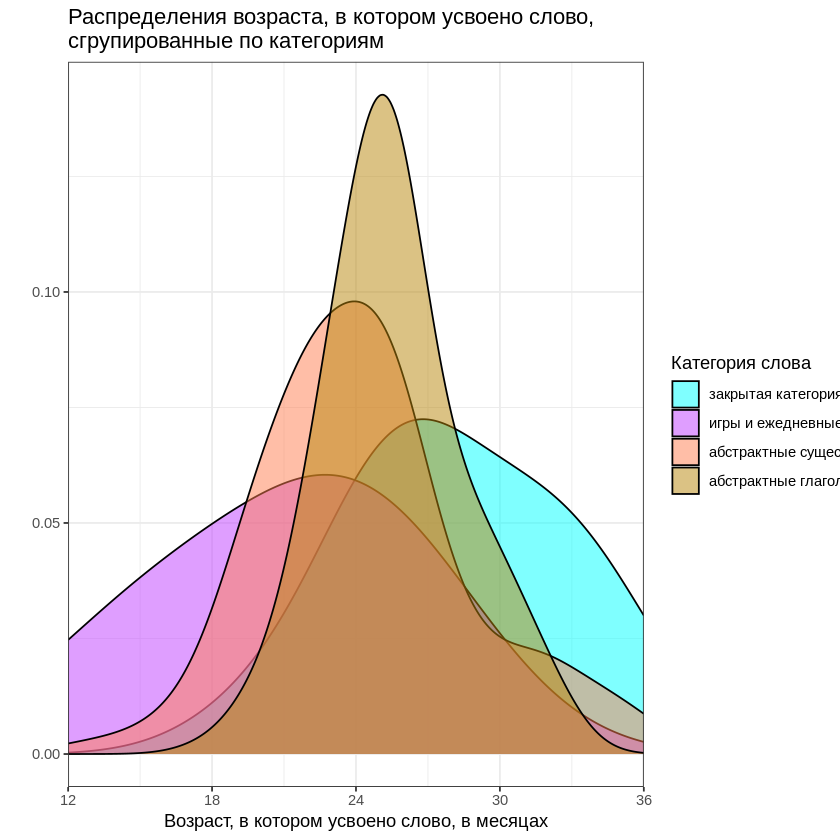

In [6]:
# это я дебажила проблемы с подписью для лейблов в легенде
set.seed(23)
palette <- sample(c("darkgoldenrod", "aquamarine", "coral","darkorchid1", "cyan",
                    "deeppink2"), 4, replace = TRUE)

# указано от 12 месяцев, т. к. это минимальное значение;
# ось у я не подписывала, поскольку это все распределения
Norwegian_data %>%
  ggplot(aes(x = AgeOfAcq, fill = BroadCategory)) +
  geom_density(alpha = 0.5,
               adjust=2) +
  scale_x_continuous(expand=c(0, 0),
                     breaks = seq(12, 36, by = 6)) +
  labs(title = 'Распределения возраста, в котором усвоено слово,\nсгрупированные по категориям',
       x = 'Возраст, в котором усвоено слово, в месяцах',
       y = '',
       fill = 'Категория слова') +
  scale_fill_manual(values = palette,
                     labels = c("closed-class" = "закрытая категория",
                                "games & routines" = "игры и ежедневные занятия",
                                "nominals" = "абстрактные существительные",
                                "predicates" = "абстрактные глаголы")) +
  theme_bw()

### 3.3 Интерпретация графика плотности  

***Ответ***

Основную часть слов дети осваивают ближе к 2 годам. Слова, относящиеся к играм и другим ежедневным занятиям, осваиваются в б**о**льшем количестве от 12 до 18 месяцев, чем слова остальных категорий. Ближе к 18 месяцам в лексике ребенка появляется больше абстрактных существительных. Слова закрытой категории осваиваются позже всего (основной объем - после 30 месяцев).

### 3.4 Возраст освоения VS кумулятивное количество ранее освоенных слов    

Постройте график рассеяния по переменным `AgeOfAcq` и `CumulOtherWords`, как показано ниже. Здесь использован геом `geom_count` с разбросом точек (jitter) и прозрачностью 0.5. Палитра - базовая. Предварительно, удалите из данных строки, для которых не указана `BroadCategory` (NA).   

<img src="https://github.com/olesar/2025dav4compling/blob/main/img/TatmanR_Lexical_acquisition_NO_scatt1.png?raw=true" width=70%>

[1] 0

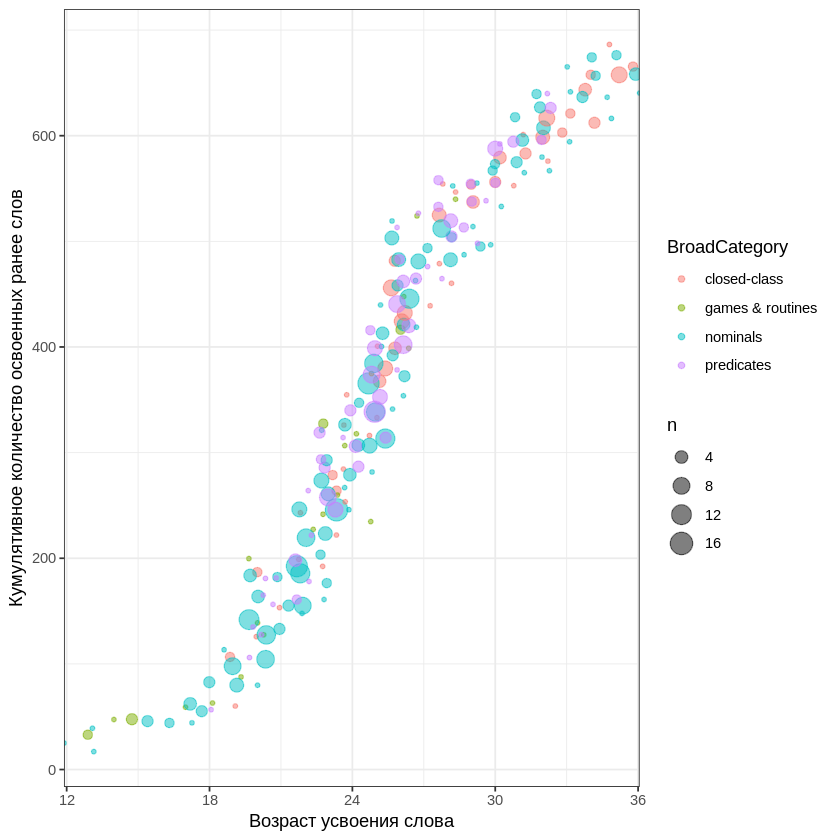

In [7]:
# проверила, что все NA были предварительно удалены
sum(is.na(Norwegian_data))

# график рассеяния
Norwegian_data %>%
  ggplot(aes(x = AgeOfAcq,
             y = CumulOtherWords,
             color = BroadCategory)) +
  scale_x_continuous(expand=c(0, 0),
                     breaks = seq(12, 36, by = 6)) +
  geom_count(position = "jitter",
    alpha = .5) +
  labs(x = 'Возраст усвоения слова',
       y = 'Кумулятивное количество освоенных ранее слов') +
  theme_bw()

### 3.5 Условия для проведения корреляционного анализа  

Условием для проведения корреляционного анализа Пирсона является нормальное распределение данных.  
Раскомментируйте код ниже, чтобы визуально оценить нормальность распределения переменной `AgeOfAcq` по графику QQ-plot (quantile-quantile plot). Данные откладываются по оси y, а по оси x откладываются значения, которые бы данные имели, если бы они были идеально нормальными (теоретические квантили). Если данные в выборке нормально распределены, все точки будут лежать на прямой. Полоса вокруг прямой показывает 95% доверительный интервал: если практически все точки попадают в этот интервал, это сильное свидетельство в пользу того, что данные в выборке распределены нормально. Данные распределены ненормально, если они образуют ломаный или сильно изогнутый паттерн, а также если они далеко отходят от прямой в той или иной области.  

In [8]:
install.packages('DescTools')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



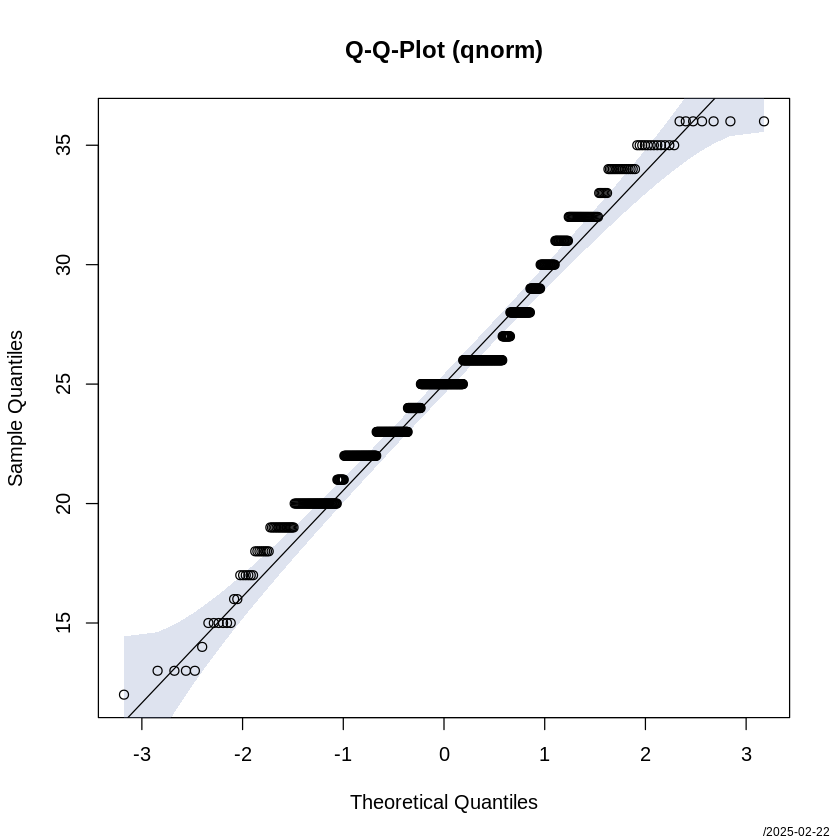

In [9]:
library(DescTools)
PlotQQ(Norwegian_data$AgeOfAcq)

Постройте QQ-plot для переменной `CumulOtherWords`.

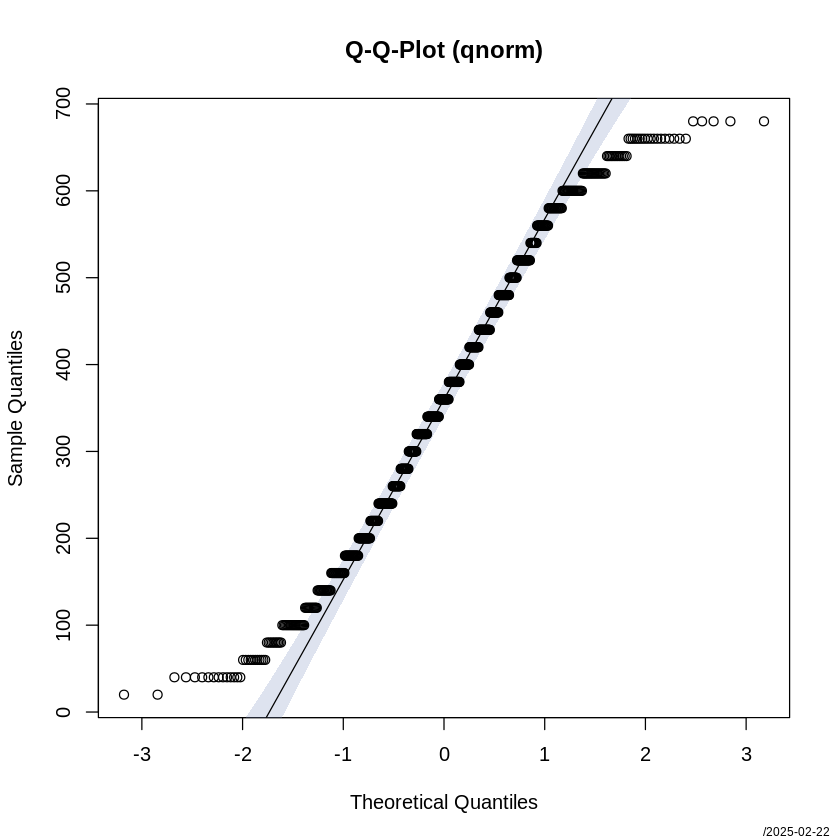

In [10]:
PlotQQ(Norwegian_data$CumulOtherWords)

На обоих QQ-плотах мы видим S-образную кривую, что говорит нам о том, что распределение не является нормальным. Следовательно, для поиска коэффициента корреляции нужно использовать непараметрический тест. Проверим нашу гипотезу с помощью теста Шапиро-Уилка.

In [11]:
shapiro.test(Norwegian_data$CumulOtherWords)
shapiro.test(Norwegian_data$AgeOfAcq)


	Shapiro-Wilk normality test

data:  Norwegian_data$CumulOtherWords
W = 0.97148, p-value = 3.609e-10



	Shapiro-Wilk normality test

data:  Norwegian_data$AgeOfAcq
W = 0.97472, p-value = 2.215e-09


Кажется, мы можем отвергнуть нулевую гипотезу о нормальности обоих распределений.

In [12]:
length(Norwegian_data$CumulOtherWords) == length(Norwegian_data$AgeOfAcq)

[1] TRUE

Количество точек для обеих переменных совпадает, следовательно, можем посчитать непараметрический коэффициент корреляции Спирмена.

### 3.6 Корреляция `AgeOfAcq` и `CumulOtherWords`   

С помощью функции cor.test проведите корреляционный анализ. Ваши выводы из предыдущего пункта (3.5) подскажут, какой метод вы должны использовать.  

In [13]:
cor.test(Norwegian_data$CumulOtherWords, Norwegian_data$AgeOfAcq, method = 'spearman')

Warning message in cor.test.default(Norwegian_data$CumulOtherWords, Norwegian_data$AgeOfAcq, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  Norwegian_data$CumulOtherWords and Norwegian_data$AgeOfAcq
S = 728574, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.985659 


### 3.7 Интерпретация результатов теста    

***Ответ***

Мы можем отвергнуть нулевую гипотезу об отсутствии корреляции между CumulOtherWords и AgeOfAcq с уровнем значимости α = 0.05 (p-value < 2.2e-16). Между переменными наблюдается статистически значимая сильная положительная связь (r=0.985659).

### 3.8 Степень свободы  

Сравните количество строк в датасете, по которому проводился корреляционный анализ, и степень свободы (df), указанную в результатах теста. Как получилось число df?

***Ответ***

У меня в тесте не указано число степеней свободы, поскольку, как я поняла, есть дублирующие значения. Возможно, я все же ошиблась, выбрав для анализа тест Спирмена.

Чтобы ответить на вопрос, я провела все же тест Пирсона.

In [14]:
cor.test(Norwegian_data$CumulOtherWords, Norwegian_data$AgeOfAcq, method = 'pearson')
nrow(Norwegian_data)


	Pearson's product-moment correlation

data:  Norwegian_data$CumulOtherWords and Norwegian_data$AgeOfAcq
t = 91.599, df = 671, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9562271 0.9674795
sample estimates:
      cor 
0.9622624 


[1] 673

df = 671, число строк в датасете - 673, разница - 2. Число степеней свободы для двух переменных рассчитывается как N - 2, где N - размер выборки. Здесь у нас есть соответствие формуле.